## Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high.


FEATURES:

- Qualification: Qualification and degrees held by the doctor

- Experience: Experience of the doctor in number of years

- Rating: Rating given by patients

- Profile: Type of the doctor

- Miscellaneous_Info: Extra information about the doctor

- Fees: Fees charged by the doctor (Target Variable)

- Place: Area and the city where the doctor is located.

### importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
Train=pd.read_excel('Final_Train.xlsx')
Test=pd.read_excel('Final_Test.xlsx')

#### Checking the first 5 rows of train and test dataset

In [3]:
Train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
Test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


#### Shape of the dataset :

In [5]:
print('Train_data',Train.shape)
print('Test_data',Test.shape)

Train_data (5961, 7)
Test_data (1987, 6)


It shows that our train dataset have 5961 rows and 7 columns where Fees is the Target column

While in Test dataset we have 1987 rows and 6 columns

#### Checking Datatypes :

In [6]:
# Training Data's datatype check
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Here we can see that we have 6 object columns, 1 integer column in the Training dataset

In [7]:
# Testing Data's datatype check
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Here we can see that we have all object columns, 1 integer column in the Testing dataset.

#### Checking Null values:

In [8]:
# Training Data's null value check
Train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

As we can see that very huge amount of null values are present of Rating & Miscellaneous_Info columns and very few in the Place column.

In [9]:
# Testing Data's null value check
Test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

As we can see that very huge amount of null values are present of Rating & Miscellaneous_Info columns and very few in Place column.

#### Converting Object dtype to integer&Float

In [10]:
# we use .str to replace and then convert to float
Train['Rating'] = Train.Rating.str.replace('%', '').astype(float)

In [11]:
# we use .str to replace and then convert to float
Test['Rating'] = Test.Rating.str.replace('%', '').astype(float)

In [12]:
# we use .str to replace and then convert to Int
Train['Experience'] = Train.Experience.str.replace('years experience', '').astype(int)

In [13]:
# we use .str to replace and then convert to Int
Test['Experience'] = Test.Experience.str.replace('years experience', '').astype(int)

#### Concating the training and testing data

In [14]:
Train['source']='train'
Test['source']='test'
df=pd.concat([Train,Test],ignore_index=True)

In [15]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12,98.0,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


Here one source column is added which tells about the which row is our train dataset and which is from test dataset as we combine both the dataset into a single dataframe

#### Checking null values:

In [16]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

here we can see that the null values of Rating ,Miscellaneous_Info and Outlet_size are added and also as Fees is not in the test dataset that's why it shows null value in this column.

#### Shape:

In [17]:
df.shape

(7948, 8)

Now we have 7948 rows and 8 columns in the dataset.

In [18]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [19]:
df.dtypes

Qualification          object
Experience              int32
Rating                float64
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

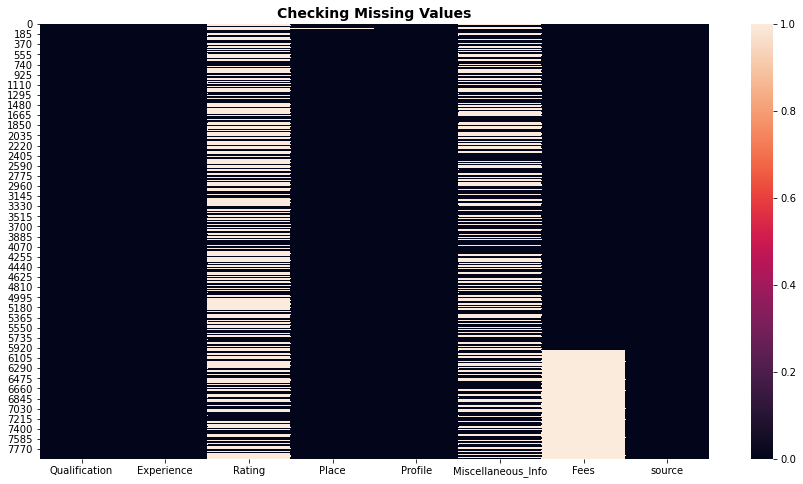

In [20]:
#Lets check this by heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.title('Checking Missing Values',fontsize=14,fontweight='bold')
plt.show()


In [21]:

#lets reset the index
df.reset_index(drop=True,inplace=True)

In [22]:
#displaying the data
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test
7946,BDS,12,98.0,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test


In [23]:
#Lets count the values of object type columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

BDS                                                                                                                                                                                   632
BHMS                                                                                                                                                                                  627
BAMS                                                                                                                                                                                  624
MBBS                                                                                                                                                                                  441
MBBS, MS - ENT                                                                                                                                                                        280
                                                                      

In [24]:
#Rating grouped by profile
df.groupby(["Profile"]).agg({"Rating":lambda x: x.value_counts().index[0]})

,Rating
Profile,
Ayurveda,100.0
Dentist,100.0
Dermatologists,100.0
ENT Specialist,100.0
General Medicine,100.0
Homeopath,100.0


Here we can see that We have 6 specialist profile of doctors with 100% Rating

In [25]:
#Lets check the rows where null values are there
df.loc[df["Rating"].isnull()]


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100.0,train
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200.0,train
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100.0,train
...,...,...,...,...,...,...,...,...
7942,"MBBS, MD - Dermatology , Venereology & Leprosy...",8,NaN,"Lajpat Nagar III, Delhi",Dermatologists,NaN,NaN,test
7943,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,test


Here we see in most of "Rating" is nan where miscellaneous_info is missing

In [26]:
#Lets replace the null values in rating with 0
df["Rating"].fillna(0,inplace=True)

In [27]:
#checking null values again
df.isnull().sum()


Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

Fees what ever null count  is there is what needs to predicted and is part of test dataset

So we are left with "Place" column which needs to be imputed

In [28]:
#Lets check the value counts
df["Place"].value_counts()

HSR Layout, Bangalore        97
Andheri West, Mumbai         97
Dwarka, Delhi                93
Banjara Hills, Hyderabad     85
Mulund West, Mumbai          81
                             ..
Nedumbassery, Ernakulam       1
IDA Jeedimetla, Hyderabad     1
Ayanambakkam, Chennai         1
Maduravoyal, Chennai          1
SV Road, Mumbai               1
Name: Place, Length: 948, dtype: int64

Here we can see the total number of places we have and we can see that Andheri West , Mumbai is highest number of occurance place with HSR Layout , Bangalore which means here numbers of doctors are more

In [29]:
#This will have 5 places where maximum number of doctors sit
top_doc_places=df["Place"].value_counts().index[0:5]

In [30]:
null_condition=df[["Place"]].isnull()
null_condition

,Place
0,False
1,False
2,False
3,False
4,False
...,...
7943,False
7944,False
7945,False
7946,False


In [31]:
#We  will impute the null values with first top 5 popular places where doctor sit
null_condition=df[["Place"]].isnull()
count=0

for index_null in null_condition.index:
    if null_condition.loc[index_null][0]==True:
        if count%5==0:
            df.loc[index_null,["Place"]]=top_doc_places[0]
        if count%5==1:
            df.loc[index_null,["Place"]]=top_doc_places[1]
        if count%5==2:
            df.loc[index_null,["Place"]]=top_doc_places[2]
        if count%5==3:
            df.loc[index_null,["Place"]]=top_doc_places[3]
        if count%5==4:
            df.loc[index_null,["Place"]]=top_doc_places[4]
        count=count+1

Here we fill the missing places or null places values with the Top 5 popular places where doctor sits more .

In [32]:
#Lets again check null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [33]:
#value counts for place
df["Place"].value_counts()


HSR Layout, Bangalore        104
Andheri West, Mumbai         103
Dwarka, Delhi                 99
Banjara Hills, Hyderabad      91
Mulund West, Mumbai           87
                            ... 
Nedumbassery, Ernakulam        1
IDA Jeedimetla, Hyderabad      1
Ayanambakkam, Chennai          1
Maduravoyal, Chennai           1
SV Road, Mumbai                1
Name: Place, Length: 948, dtype: int64

Therefore we have evenly imputed the null values with top 5 places.

**Place:**

We will split the area and the city into two different features as they can give us hints about the fees.

In [34]:
df['Place'].fillna('None,None',inplace=True)

At first we are going to fill the null values with (None,None)

Now we  separate the comma separated two types-city and area.

In [35]:
df['Area']=df['Place'].str.rsplit(',',1).str.get(0)
df['City']=df['Place'].str.rsplit(',',1).str.get(1)

df['City']=df['City'].str.strip()


In [36]:
df['Area'].isnull().sum()

0

In [37]:
df['City'].isnull().sum()

1

Here we can see that there is a missing value in the city column

In [38]:
df[df['City'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,Area,City
3980,BDS,23,0.0,e,Dentist,NaN,250.0,train,e,NaN


In row 3980 there is a null value present in the City

we are going to make this column 'None' for city and area both

In [39]:
df.loc[df['City'].isnull(),'Area']='None'

In [40]:
df['City']=df['City'].fillna('None')

In [41]:
df['Area'].isnull().sum()

0

In [42]:
df['City'].isnull().sum()

0

Hence here no null is present

In [43]:
#Let's drop the Place column
df.drop('Place',axis=1,inplace=True)

**Qualification**

We are going to check which degrees the doctors have and then treat them as several features.

In [44]:
df['Qualification'].value_counts()[:30]

BDS                                                      632
BHMS                                                     627
BAMS                                                     624
MBBS                                                     441
MBBS, MS - ENT                                           280
MBBS, MD - Dermatology                                   242
MBBS, MD - General Medicine                              227
MBBS, MD - Dermatology , Venereology & Leprosy           193
MBBS, DDVL                                               123
BHMS, MD - Homeopathy                                    120
MBBS, Diploma in Otorhinolaryngology (DLO)               114
BAMS, MD - Ayurveda Medicine                             106
BDS, MDS - Conservative Dentistry & Endodontics           89
MBBS, DDV                                                 81
BDS, MDS                                                  77
BDS, MDS - Oral & Maxillofacial Surgery                   76
MD - Dermatology , Vener

We can see that -

MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS  , these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [45]:
# func to make feature 
def fun(arr,string):
    for data in dat:
        if data.find(string) !=-1:
            arr.append(int(1))
        else :
            arr.append(int(0))
def to_df(lst):
    lst=pd.DataFrame(lst)
    return lst

cols=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

In [46]:
dat=df['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mlo,'MLO')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

mbbs=to_df(mbbs)
bds=to_df(bds)
bams=to_df(bams)
md=to_df(md)
bhms=to_df(bhms)
fellowship=to_df(fellowship)
dlo=to_df(dlo)
mlo=to_df(mlo)
dnb=to_df(dnb)
ddvl=to_df(ddvl)
ms=to_df(ms)



In [47]:
df.drop('Qualification',1,inplace=True)
df=pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,df],axis=1)

mx=df.columns[11:]
for i in mx:
    cols.append(i)
df.columns=cols

So here we created the function where we added the features and concated with the dataset and also we drop the Qualification columns because it is not necessary now ,

- Fellowship is used to define the extra qualification or degree of the doctor if he / she had any.
- Creating the list and converting it to the dataframe


In [48]:
df

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,0.0,ENT Specialist,NaN,300.0,train,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0,0,1,0,0,0,0,0,0,1,0,10,0.0,Ayurveda,NaN,NaN,test,Basavanagudi,Bangalore
7944,1,0,0,0,0,0,0,0,1,0,0,4,0.0,Dermatologists,NaN,NaN,test,Choolai,Chennai
7945,1,0,0,0,0,0,0,0,1,1,0,9,0.0,General Medicine,NaN,NaN,test,Porur,Chennai
7946,0,0,0,0,0,0,0,1,0,0,0,12,98.0,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,test,Arekere,Bangalore


**Miscellaneaous_Info**

As the column holds special information and blank spaces also, treat all the non-null as '1' and others as '0'.

In [49]:
for i in df['Miscellaneous_Info'].value_counts().index:
    df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
df['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [50]:
df.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100.0,Homeopath,1.0,100.0,train,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98.0,Ayurveda,1.0,350.0,train,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,0.0,ENT Specialist,0.0,300.0,train,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,0.0,Ayurveda,1.0,250.0,train,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100.0,Ayurveda,1.0,250.0,train,Keelkattalai,Chennai


In [51]:
profile=df['Profile'].value_counts().index
Area=df['Area'].value_counts().index
City=df['City'].value_counts().index

#### Qualification

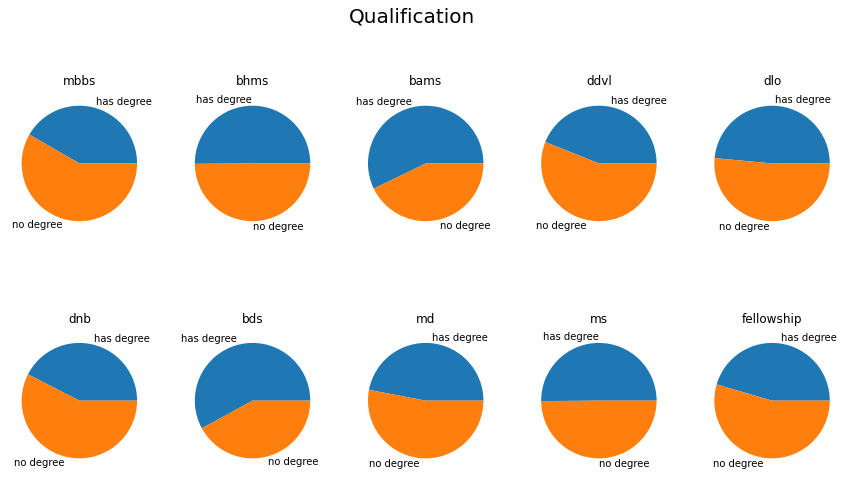

In [52]:
col1=['mbbs','bhms','bams','ddvl','dlo','dnb','bds','md','ms','fellowship']
lab=['has degree','no degree']
fig,axes=plt.subplots(2,5,figsize=(15,8))
fig.suptitle('Qualification',fontsize=20)
k=1
for col in col1:
    arr=[]
    for i in range(2):
        x=df[df[col]==i]
        arr.append(np.mean(x['Fees']))
    plt.subplot(2,5,k)
    k+=1 
    plt.title(col)
    plt.pie(arr,labels=lab)
plt.show()

It is not showing a greater influence of any singular degree . So we are going to sum up and check again

In [53]:
col2=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']
summ=np.zeros(len(df))
for i in col2:
    arr=df[i]
    summ=np.add(summ,arr)
temp_df=pd.DataFrame({'qual':summ,'fees':df['Fees']})     # created a dataframe adding all the qualifications into one.

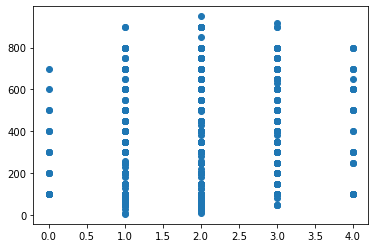

In [54]:
plt.scatter(temp_df['qual'],temp_df['fees'])


Here we can see that the doctor who have qualification degree of 1 or 2 are in very high number.

####  Qualification Vs fees

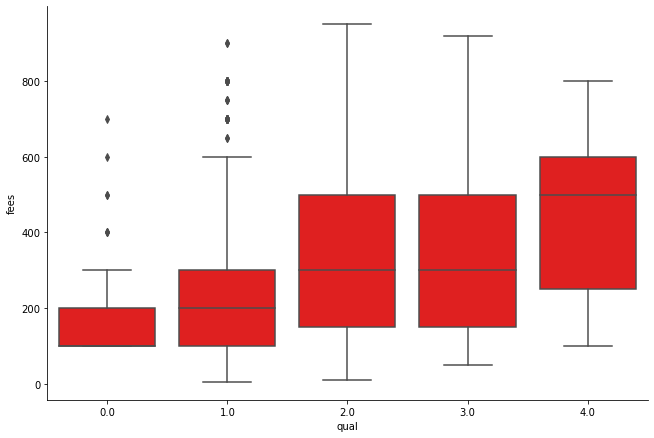

In [55]:
sns.catplot(x='qual',y='fees', data=temp_df.sort_values("fees"),kind='box',height=6,aspect= 1.5,color='r')
plt.show()

This catplot shows that the charges also vary with the total qualification of the doctors. They increase with increase in number of degrees.

#### Profile vs Fees

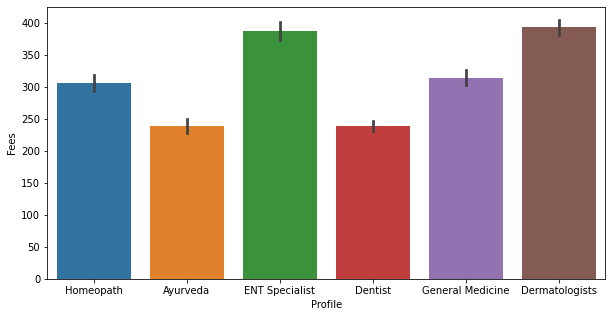

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df)
plt.show()


Here it is clear that ENT specialist and Dermatologists charge more

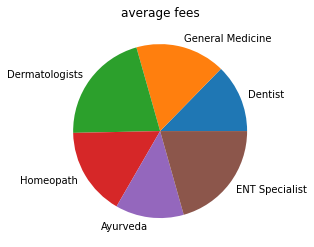

In [57]:
arr=[]
for i in profile:
    x=df[df['Profile']==i]
    arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=profile)
plt.show()

It states that 'Ayurveda' doctors earns some less than others.

whereas the 'Dermatologists' and the 'ENT' specialists are earning more.

#### City Vs Fees

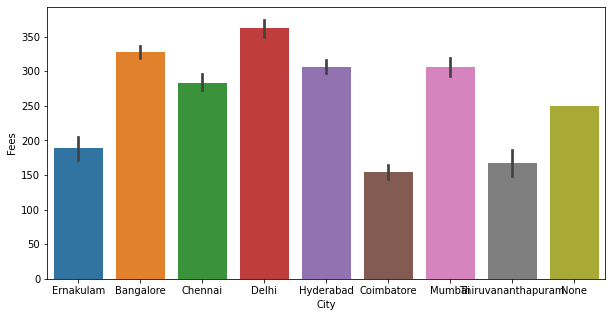

In [58]:
#lets check the averge rate of doctors in a city
plt.figure(figsize=(10,5))
sns.barplot(x="City",y="Fees",data=df)
plt.show()

In delhi averge fees is maximum compared to other cities


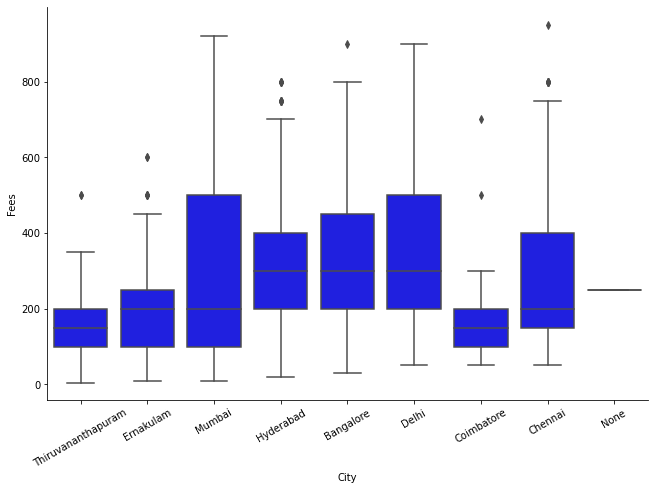

In [59]:
sns.catplot(x='City',y='Fees', data=df.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

Mumbai and Delhi doctors have higher fees in comparison to other  doctors.

#### Experience vs Fees

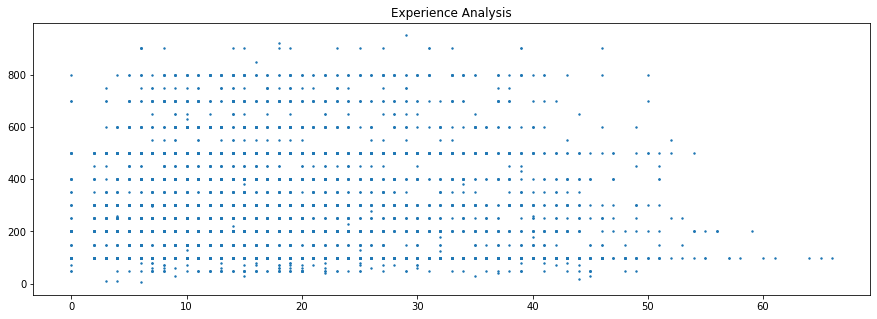

In [60]:
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')

plt.scatter(df['Experience'],df['Fees'],s=2)
plt.show()

The experience doesn't look quite corelated with the fees.

#### Miscellaneous Info

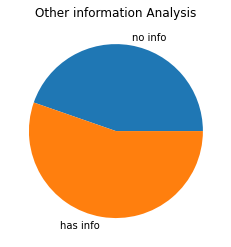

In [61]:
arr=[]
for i in range(2):
    x=df[df['Miscellaneous_Info']==i]
    arr.append(np.mean(x['Fees']))
plt.title('Other information Analysis')
lab=['no info','has info']

plt.pie(arr,labels=lab)
plt.show()

It is seen that the doctors having other info charges more than others.



#### Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

Converting the categorical column data into the Numerical data

In [63]:
df

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100.0,5,1.0,100.0,1,325,4
1,0,0,1,0,0,0,0,0,1,1,0,12,98.0,0,1.0,350.0,1,927,0
2,1,0,0,0,0,0,0,0,0,1,0,9,0.0,3,0.0,300.0,1,495,0
3,0,0,1,0,0,0,0,0,0,1,0,12,0.0,0,1.0,250.0,1,74,0
4,0,0,1,0,0,0,0,0,0,1,0,20,100.0,0,1.0,250.0,1,368,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,0,0,1,0,0,0,0,0,0,1,0,10,0.0,0,0.0,NaN,0,76,0
7944,1,0,0,0,0,0,0,0,1,0,0,4,0.0,2,0.0,NaN,0,135,1
7945,1,0,0,0,0,0,0,0,1,1,0,9,0.0,4,0.0,NaN,0,660,1
7946,0,0,0,0,0,0,0,1,0,0,0,12,98.0,1,1.0,NaN,0,34,0


In [64]:
df.isnull().sum()

mbbs                     0
bhms                     0
bams                     0
ddvl                     0
dlo                      0
mlo                      0
dnb                      0
bds                      0
md                       0
ms                       0
fellowship               0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
Area                     0
City                     0
dtype: int64

No null values are present.

####  Separate test and train data

In [65]:
Train=df.loc[df["source"]==1]
Test=df.loc[df["source"]==0]

In [66]:
#Resetting the index
Test.reset_index(drop=True,inplace=True)

In [67]:
#Dropping the source column
Train.drop(columns=["source"],inplace=True)
Test.drop(columns=["source"],inplace=True)

In [68]:
#Dropping the source column
Test.drop(columns=["Fees"],inplace=True)

In [69]:
#Lets separate the input and output from train dataset
df_x=Train.drop(columns=["Fees"])
y=Train[["Fees"]]

In [70]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [71]:
x.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,-0.942753,2.639934,-0.382840,-0.166609,-0.216119,0.0,-0.270704,-0.544198,1.256743,1.322701,-0.190618,0.600979,1.220669,1.543016,0.885549,-0.439599,0.397231
1,-0.942753,-0.378797,2.612056,-0.166609,-0.216119,0.0,-0.270704,-0.544198,1.256743,1.322701,-0.190618,-0.476040,1.178419,-1.472893,0.885549,1.727320,-1.324248
2,1.060723,-0.378797,-0.382840,-0.166609,-0.216119,0.0,-0.270704,-0.544198,-0.795708,1.322701,-0.190618,-0.745295,-0.891845,0.336652,-1.129243,0.172322,-1.324248
3,-0.942753,-0.378797,2.612056,-0.166609,-0.216119,0.0,-0.270704,-0.544198,-0.795708,1.322701,-0.190618,-0.476040,-0.891845,-1.472893,0.885549,-1.343082,-1.324248
4,-0.942753,-0.378797,2.612056,-0.166609,-0.216119,0.0,-0.270704,-0.544198,-0.795708,1.322701,-0.190618,0.241972,1.220669,-1.472893,0.885549,-0.284819,-0.893878


### Model Building

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Model Training

In [77]:
model=[LinearRegression(),DecisionTreeRegressor(),
       KNeighborsRegressor(),RandomForestRegressor(),
       AdaBoostRegressor(),Lasso(),SVR()]
max_r2_score=0
for r_state in range(40,90):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    for i in model:
        i.fit(x_train,y_train)
        pre=i.predict(x_test)
        r2_scr=r2_score(y_test,pre)
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            final_state = r_state
            final_model= i
print()
print("Max R2 score correspond to random size ",final_state,"is",max_r2_score,"and model is",final_model)


Max R2 score correspond to random size  84 is 0.2246306258151598 and model is RandomForestRegressor()


In [79]:
clf=RandomForestRegressor(random_state=84,criterion='mse')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE loss in train : 65.97293725528122


### Hyperparameter Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)
0.21040165939251568


In [85]:
Rfr = RandomForestRegressor( max_depth=90, max_features='sqrt',
                       min_samples_split=10,min_samples_leaf=2,
                      n_estimators=200)
Rfr.fit(x_train,y_train)
pred=Rfr.predict(x_test)
r2_sc= r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 23.52919351618801


In [87]:
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error:  129.09472442968527
Mean Squared Error:  27045.49048177369
RMSE loss in train : 164.4551321235482


In [89]:
score=cross_val_score(Rfr,x,y,cv=5)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The score after cross_validation :  [0.21274911 0.21740621 0.24386138 0.21190611 0.20464714]
The Mean score after cross_validation :  0.21811398926065953


In [99]:
#Applying model on the test set
y_prediction=Rfr.predict(Test)

In [100]:
for i in range(len(y_prediction)):
    print(y_prediction[i])
    break

272.90995172727247


This seems that the fees are in float values. But we need them rounded with 50 as all the fees given in the test set are similar to that.

In [101]:
def rounding(x):
    m=(x//50)*50
    if m==x:
        return int(x/1.0)
    elif x-m>=25.0:
        return int((m+50)/1.0)
    else:
        return int(m/1.0)

In [103]:
y_fin=[]
for i in range(len(y_prediction)):
    y_fin.append(rounding(y_prediction[i]))
y_fin=pd.DataFrame({'id':np.arange(1,len(y_fin)+1,1),'Fees':y_fin})
print(y_fin.head())

   id  Fees
0   1   250
1   2   250
2   3   250
3   4   400
4   5   350


In [104]:
#Storing results as csv
y_fin.to_csv("doctor_fees_predictions.csv",index=False)

### Saving the model

In [120]:
#saving the model
model=joblib.dump(Rfr,'DocFee_RFR.obj')

- While calculating the best random state the 84 is best state which providing the highest R2 score value for this model.

- After using the RandomizedSearchCV, I can find the best param and then I used these param for that model.

- After using the best param I can get the best R2 score and the model is RandomForestRegressor.

- And then finally we predict the Fee of given Test dataset